<a href="https://colab.research.google.com/github/PedroHudson/MVP_2/blob/main/MVP_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Importação do Pandas
import pandas as pd

# Importação do Numpy
import numpy as np

# Importação do Pyplot
import matplotlib.pyplot as plt

# Importação de pacotes Matplotlib
from matplotlib import cm

# Importação do Seaborn
import seaborn as sns

# Feature Selection
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada

# Transformações Númericas

# Normalização
from sklearn.preprocessing import MinMaxScaler

# Padronização
from sklearn.preprocessing import StandardScaler

# Configuração para não exibir Warnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Importando dados da url para um dataframe

# url a importar
url_dados = 'https://github.com/PedroHudson/diabetes/blob/main/diabetes.csv?raw=true'

# carga do dataset através da url
dataset = pd.read_csv(url_dados, sep=',')

In [55]:
# Visualização da quantidade de instâncias e atributos do dataset
dataset.shape

(100000, 9)

In [56]:
# Visualização da quantidade de linhas por coluna
dataset.count()

gender                 100000
age                    100000
hypertension           100000
heart_disease          100000
smoking_history        100000
bmi                    100000
HbA1c_level            100000
blood_glucose_level    100000
diabetes               100000
dtype: int64

In [50]:
# Visualização dos tipos de dados
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [51]:
# Visualização das primeiras linhas do dataframe
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [52]:
# Visualização das últimas linhas do dataframe
dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [21]:
dataset_distrib = dataset['diabetes'].value_counts()/len(dataset)
dataset_distrib

0    0.915
1    0.085
Name: diabetes, dtype: float64

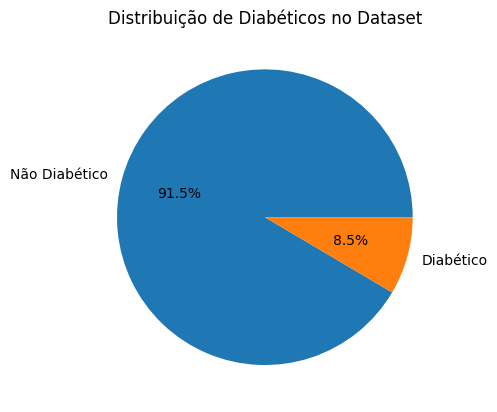

In [22]:
plt.pie(dataset_distrib, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

In [24]:
neg_diab = dataset[dataset['diabetes']==0].sample(8500)
pos_diab = dataset[dataset['diabetes']==1]
dataset_balanceado = pd.concat([neg_diab,pos_diab],axis=0)


In [25]:
dataset_dist = dataset_balanceado['diabetes'].value_counts()/len(dataset)
dataset_dist

0    0.085
1    0.085
Name: diabetes, dtype: float64

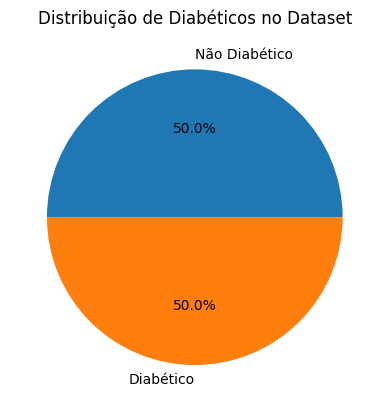

In [26]:
plt.pie(dataset_dist, labels = ['Não Diabético', 'Diabético'],
       autopct = '%1.1f%%')
plt.title("Distribuição de Diabéticos no Dataset")
plt.show()

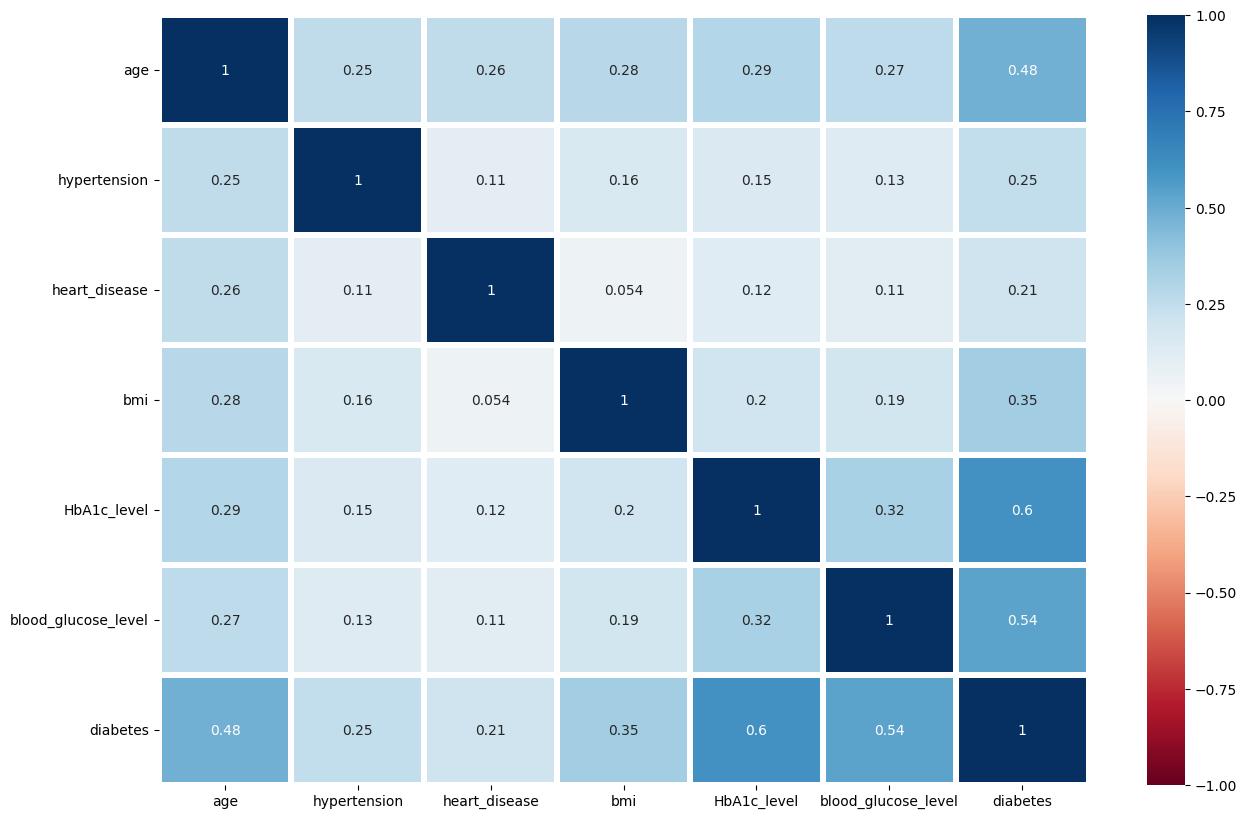

In [27]:
# Grafico de correlação com Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(dataset_balanceado.corr(), annot=True, cmap= 'RdBu', vmin=-1, vmax=1, linewidths=3,linecolor='white');


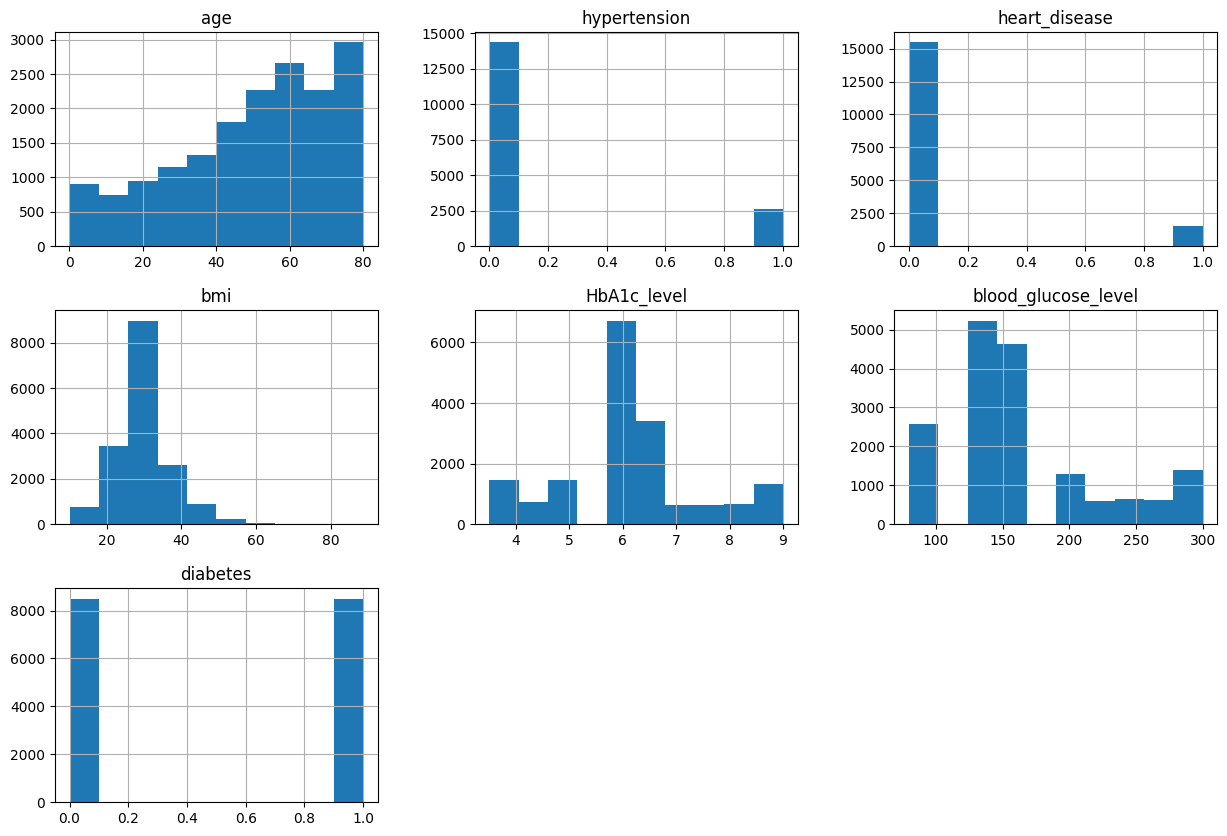

In [28]:
# Histograma
dataset_balanceado.hist(figsize = (15,10))
plt.show()

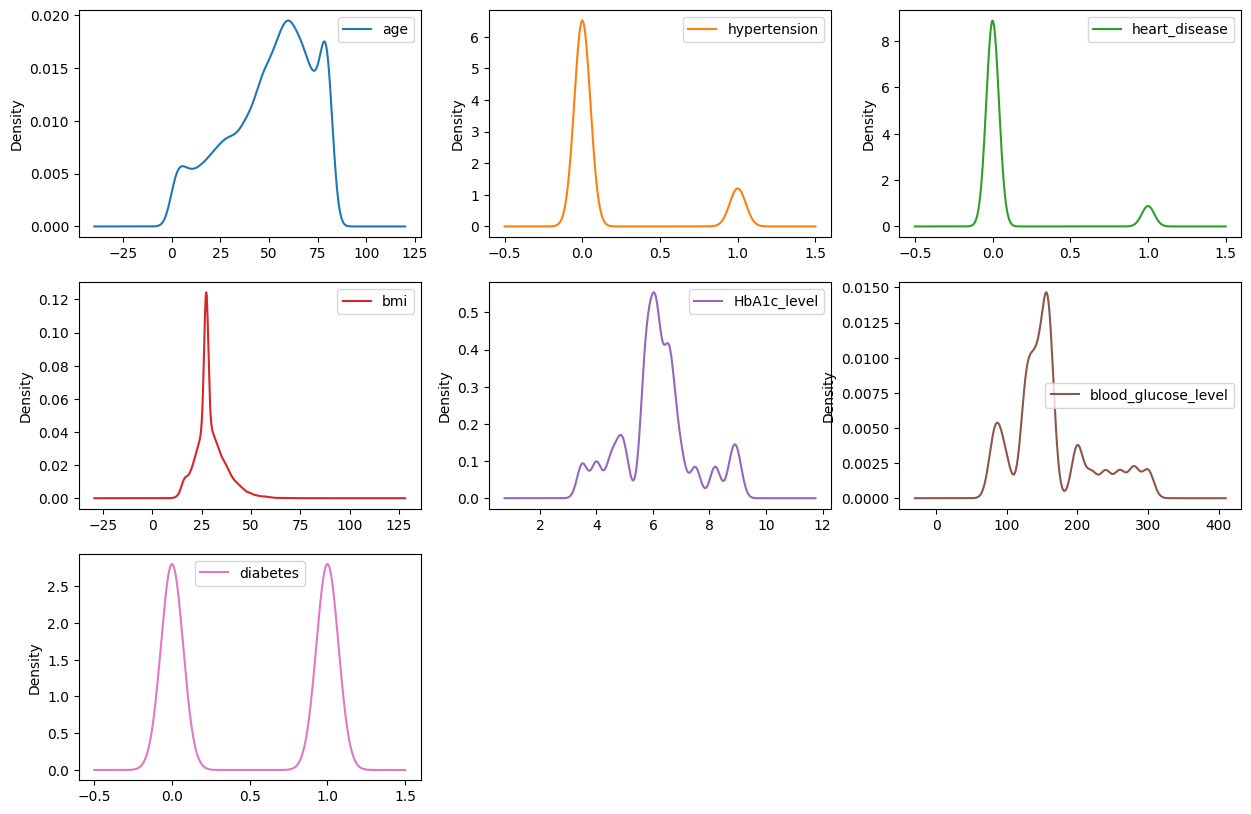

In [29]:
# Density Plot
dataset_balanceado.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

In [30]:
dataset_balanceado.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [31]:
# Seleção das colunas para a criação do novo dataframe
dataset_novo = dataset_balanceado[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

In [32]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset_novo.values
X = array[:,0:6]
y = array[:,6]


In [33]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", dataset_novo.columns[0:6])

# Exibe as pontuações de cada atributo e os 4 escolhidos (com pontuação mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_novo.columns[0:6]))


Número original de atributos: 6

Número reduzido de atributos: 4

Atributos Originais: Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

Scores dos Atributos Originais: [5062.633 1106.889  745.974 2303.514 9713.127 6898.443]

Atributos Selecionados: ['age' 'bmi' 'HbA1c_level' 'blood_glucose_level']


In [34]:
# Seleção das colunas para a criação do novo dataframe
dataset_final = dataset_novo[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','diabetes']]

In [35]:
dataset_final.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
34224,38.0,23.96,6.6,80,0
43362,15.0,22.82,6.1,155,0
50912,57.0,27.32,5.8,140,0
73721,11.0,27.32,6.1,85,0
28091,45.0,27.32,4.5,159,0


In [36]:
# Imports Necessários

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# Separação em conjunto de treino e teste com holdout

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# separação em conjunto de treino e teste
array = dataset_final.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

LR: 0.876544 (0.007757)
KNN: 0.856838 (0.010378)
CART: 0.875074 (0.008164)
NB: 0.864191 (0.008619)
SVM: 0.863603 (0.008898)
Bagging: 0.895000 (0.008785)
RF: 0.895956 (0.009684)
ET: 0.888897 (0.010627)
Ada: 0.906029 (0.008252)
GB: 0.907721 (0.008176)
Voting: 0.892794 (0.006442)


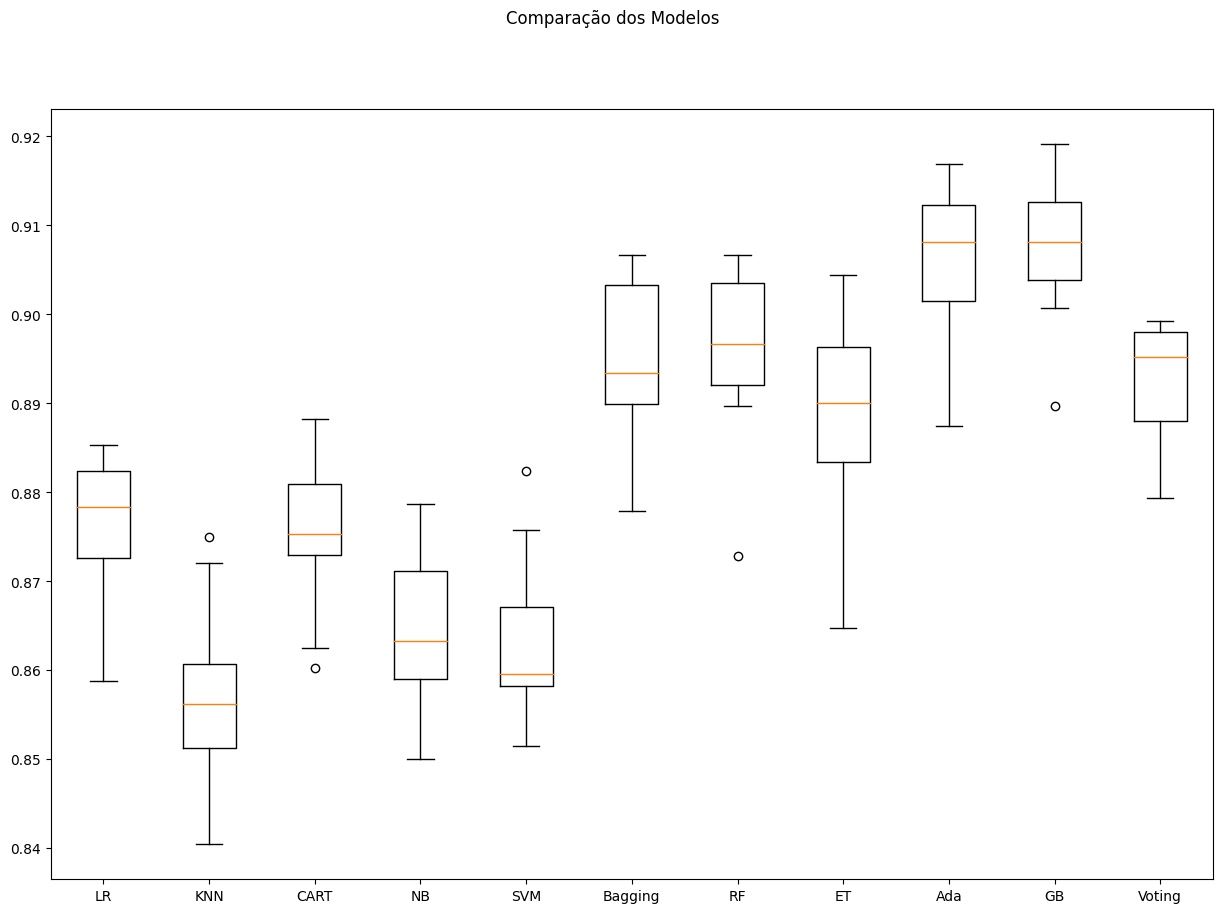

In [38]:
# Modelagem e Inferência

# Criação e avaliação de modelos: Linha Base

np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


LR-orig: 0.877 (0.008)
KNN-orig: 0.857 (0.010)
CART-orig: 0.875 (0.008)
NB-orig: 0.864 (0.009)
SVM-orig: 0.864 (0.009)
Bag-orig: 0.895 (0.009)
RF-orig: 0.896 (0.010)
ET-orig: 0.889 (0.011)
Ada-orig: 0.906 (0.008)
GB-orig: 0.908 (0.008)
Vot-orig: 0.893 (0.006)
LR-padr: 0.877 (0.008)
KNN-padr: 0.886 (0.012)
CART-padr: 0.876 (0.009)
NB-padr: 0.864 (0.009)
SVM-padr: 0.895 (0.008)
Bag-padr: 0.896 (0.010)
RF-padr: 0.896 (0.008)
ET-padr: 0.890 (0.012)
Ada-padr: 0.906 (0.008)
GB-padr: 0.908 (0.008)
Vot-padr: 0.892 (0.007)
LR-norm: 0.876 (0.008)
KNN-norm: 0.886 (0.010)
CART-norm: 0.875 (0.008)
NB-norm: 0.864 (0.009)
SVM-norm: 0.894 (0.007)
Bag-norm: 0.895 (0.009)
RF-norm: 0.896 (0.008)
ET-norm: 0.888 (0.011)
Ada-norm: 0.906 (0.008)
GB-norm: 0.908 (0.008)
Vot-norm: 0.892 (0.007)


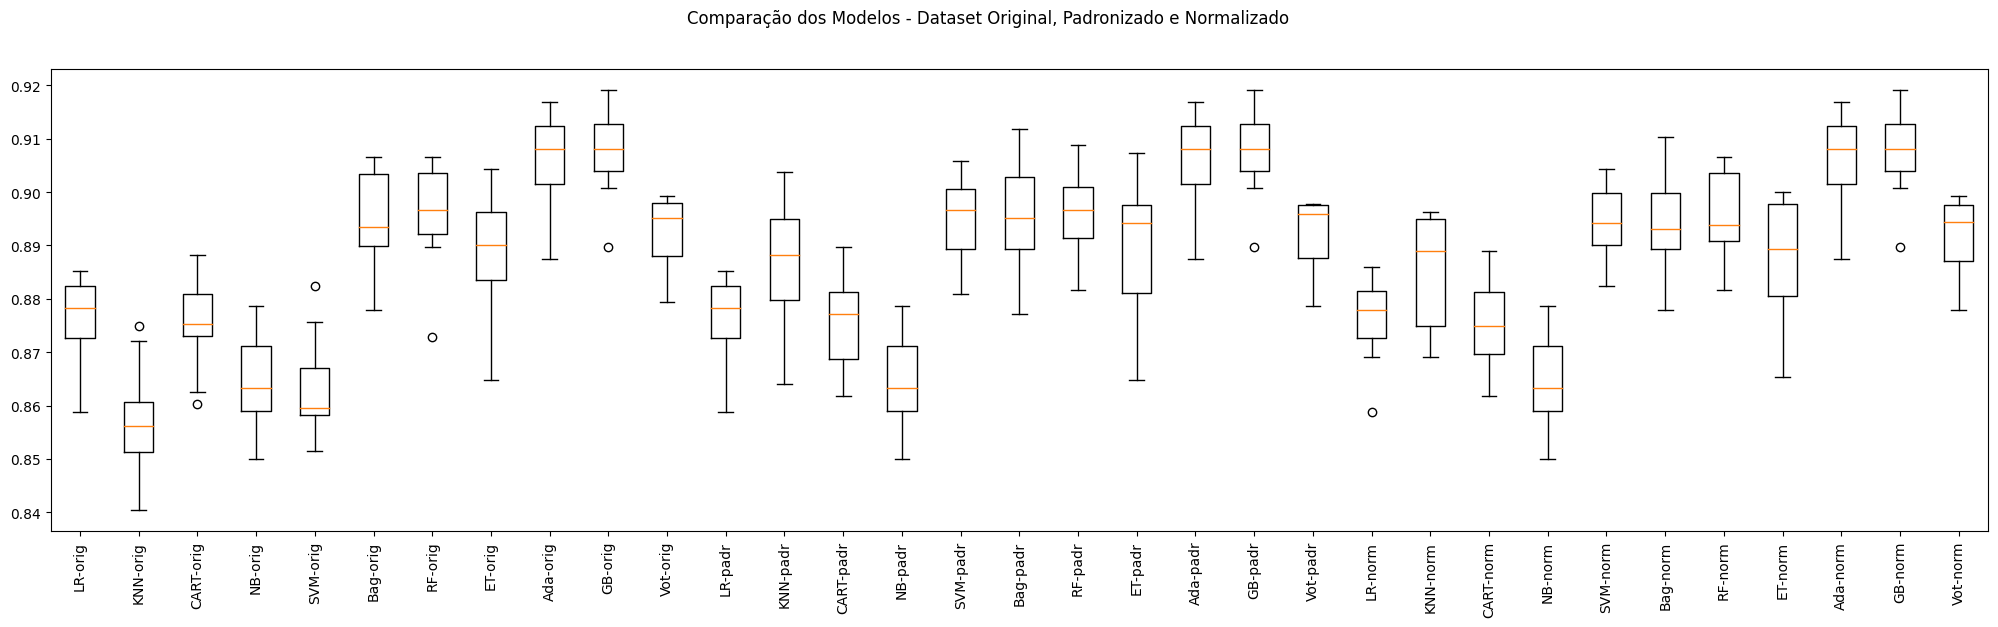

In [39]:
# Criação e avaliação de modelos: dados padronizados e normalizados

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset Original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

#Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset Original, Padronizado e Normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


In [ ]:
# Otimização de Hiperparâmetros

# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV

for name, model in pipelines:
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
  grid.fit(X_train, y_train)
  # imprime a melhor configuração
  print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.867868 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.897059 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-norm - Melhor: 0.896985 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


In [44]:
# Finalização do Modelo

# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier(random_state=10)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9088235294117647


In [45]:
# Preparação do modelo com todo o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com todo o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com todo o dataset
model.fit(rescaledX, y)

GradientBoostingClassifier(random_state=10)